In [1]:
import pandas as pd

In [2]:
df =pd.read_csv("logistic_regression_results_CellCount.csv")
df = df.groupby("assay").mean().reset_index()
df

,assay,best_C,val_auc,test_auc
0,1,0.000001,0.448052,0.687500
1,2,0.000001,0.608995,0.701055
2,3,0.000001,0.437500,0.483279
3,4,0.000001,0.538095,0.647436
4,5,0.000001,0.407407,0.688889
...,...,...,...,...
200,205,0.000001,0.595678,0.652563
201,206,0.000001,0.928571,0.767677
202,207,0.000001,1.000000,0.333333
203,208,0.000001,0.666667,0.687286


In [3]:
df.test_auc.mean()

0.7010185917785886

In [4]:
df.test_auc.std()

0.22132547970283226

In [5]:
len(df[df["test_auc"]>=0.9])

64

In [6]:
len(df[df["test_auc"]>=0.8])

74

In [7]:
len(df[df["test_auc"]>=0.7])

103

In [8]:
len(df[df["test_auc"]>=0.5])

169

In [9]:
cloome =pd.read_csv("cloome_results.csv")
cloome

,Type,Method,AUC (mean),AUC(stdev),F1(mean),F1(stdev),AUC > 0.9,AUC > 0.8,AUC > 0.7
0,Linear probing,CLOOME,0.714,0.20,0.395,0.32,57,84,109
1,Linear probing,CellProfiler,0.655,0.20,0.273,0.32,35,63,84
2,Supervised,ResNet,0.731,0.19,0.508,0.30,68,94,119
3,Supervised,DenseNet,0.730,0.19,0.530,0.30,61,98,121
4,Supervised,GapNet,0.725,0.19,0.510,0.29,63,94,117
5,Supervised,MIL-Net,0.711,0.18,0.445,0.32,61,81,105
6,Supervised,M-CNN,0.705,0.19,0.482,0.31,57,78,105
7,Supervised,SC-CNN,0.705,0.20,0.362,0.29,61,83,109
8,Supervised,FNN,0.675,0.20,0.361,0.31,55,71,90


In [10]:
df =pd.read_csv("logistic_regression_results_CellCount_MW_logP.csv")
df

,assay,best_C,val_auc,test_auc,split,N_labels_test
0,2,0.100000,0.700000,0.581633,split1,21
1,4,0.000001,0.333333,0.415385,split1,18
2,5,1.000000,0.750000,0.566667,split1,11
3,8,0.000001,0.266667,0.555556,split1,10
4,9,0.100000,0.800000,0.525714,split1,32
...,...,...,...,...,...,...
582,204,10.000000,0.730159,0.670996,split3,32
583,205,10.000000,0.778912,0.727273,split3,52
584,206,0.000001,1.000000,0.888889,split3,15
585,208,0.000001,0.500000,0.568627,split3,20


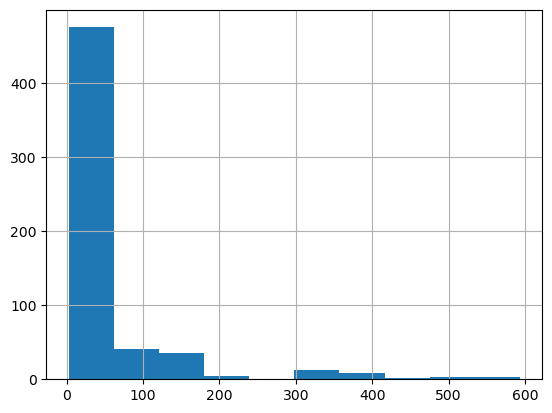

In [11]:
import matplotlib.pyplot as plt

df.N_labels_test.hist()
plt.show()

In [12]:
df = df.groupby("assay").mean().reset_index()
df

,assay,best_C,val_auc,test_auc,N_labels_test
0,1,5.000000,0.306277,0.512755,24.000000
1,2,0.066667,0.632804,0.648742,20.333333
2,3,5.000000,0.671875,0.614035,22.000000
3,4,3.666667,0.507302,0.487821,19.000000
4,5,0.336667,0.796296,0.566667,13.000000
...,...,...,...,...,...
203,205,7.000000,0.763930,0.831760,61.000000
204,206,0.000001,1.000000,0.838384,14.500000
205,207,0.000001,1.000000,0.416667,7.000000
206,208,0.003334,0.761905,0.574230,19.666667


In [13]:
df.test_auc.mean()

0.7435650352296341

In [14]:
df.test_auc.std()

0.20512235935716278

In [15]:
len(df[df["test_auc"]>=0.9])

64

In [16]:
len(df[df["test_auc"]>=0.8])

103

In [17]:
len(df[df["test_auc"]>=0.7])

128

In [18]:
len(df[df["test_auc"]>=0.5])

186

In [19]:
individual_CLOOME = pd.read_csv("data/results/CLOOME_updated_results.csv").rename(columns={"Test_AUC": "CLOOME"})
individual_CLOOME["Task"] = individual_CLOOME["Task"] +1
individual_CLOOME

,Task,CLOOME
0,1,0.396443
1,2,0.667922
2,3,0.536829
3,4,0.363569
4,5,0.574461
...,...,...
205,206,0.654132
206,207,0.515410
207,208,0.762384
208,209,0.806669


In [20]:
cml = df.rename(columns={"test_auc": "Cell Count MW LogP", "assay":"Task"})[["Task", "Cell Count MW LogP"]]
cml

,Task,Cell Count MW LogP
0,1,0.512755
1,2,0.648742
2,3,0.614035
3,4,0.487821
4,5,0.566667
...,...,...
203,205,0.831760
204,206,0.838384
205,207,0.416667
206,208,0.574230


In [21]:
cellcount =pd.read_csv("logistic_regression_results_CellCount.csv")
cellcount = cellcount.groupby("assay").mean().reset_index()
cellcount = cellcount.rename(columns={"test_auc": "Cell Count", "assay":"Task"})[["Task", "Cell Count"]]
cellcount

,Task,Cell Count
0,1,0.687500
1,2,0.701055
2,3,0.483279
3,4,0.647436
4,5,0.688889
...,...,...
200,205,0.652563
201,206,0.767677
202,207,0.333333
203,208,0.687286


In [22]:
results = pd.merge(cml, individual_CLOOME)
results = pd.merge(results, cellcount)
results

,Task,Cell Count MW LogP,CLOOME,Cell Count
0,1,0.512755,0.396443,0.687500
1,2,0.648742,0.667922,0.701055
2,3,0.614035,0.536829,0.483279
3,4,0.487821,0.363569,0.647436
4,5,0.566667,0.574461,0.688889
...,...,...,...,...
200,205,0.831760,0.837970,0.652563
201,206,0.838384,0.654132,0.767677
202,207,0.416667,0.515410,0.333333
203,208,0.574230,0.762384,0.687286


In [23]:

# Create DataFrame
venndf = results

# Function to count values above a threshold
def count_above_threshold(column, threshold):
    return (venndf[column] >= threshold).sum()

# Define thresholds
thresholds = [0.999, 0.9, 0.8, 0.7, 0.5]

# Calculate counts for each model and threshold
count_data = {}
for col in venndf.columns[1:]:  # Exclude 'Assay' and 'CHEMBL_ID'
    count_data[col] = {f'>{threshold}': count_above_threshold(col, threshold) for threshold in thresholds}

# Convert the results to a DataFrame
venndfcount_df = pd.DataFrame(count_data).transpose()

venndfcount_df


,>0.999,>0.9,>0.8,>0.7,>0.5
Cell Count MW LogP,1,64,103,128,186
CLOOME,0,57,83,101,175
Cell Count,1,64,74,103,169


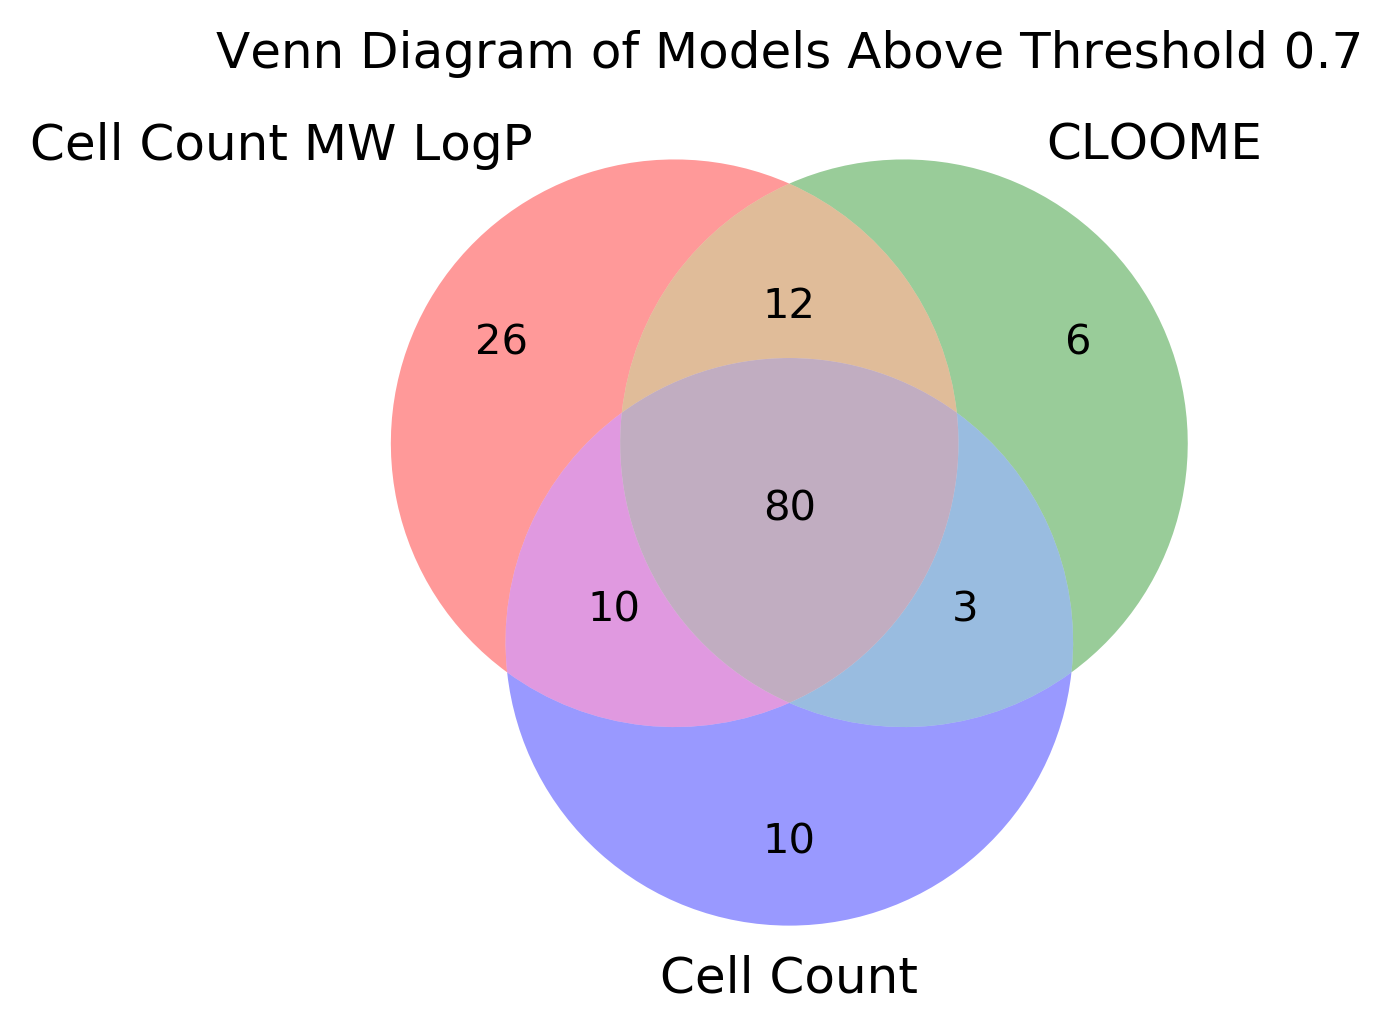

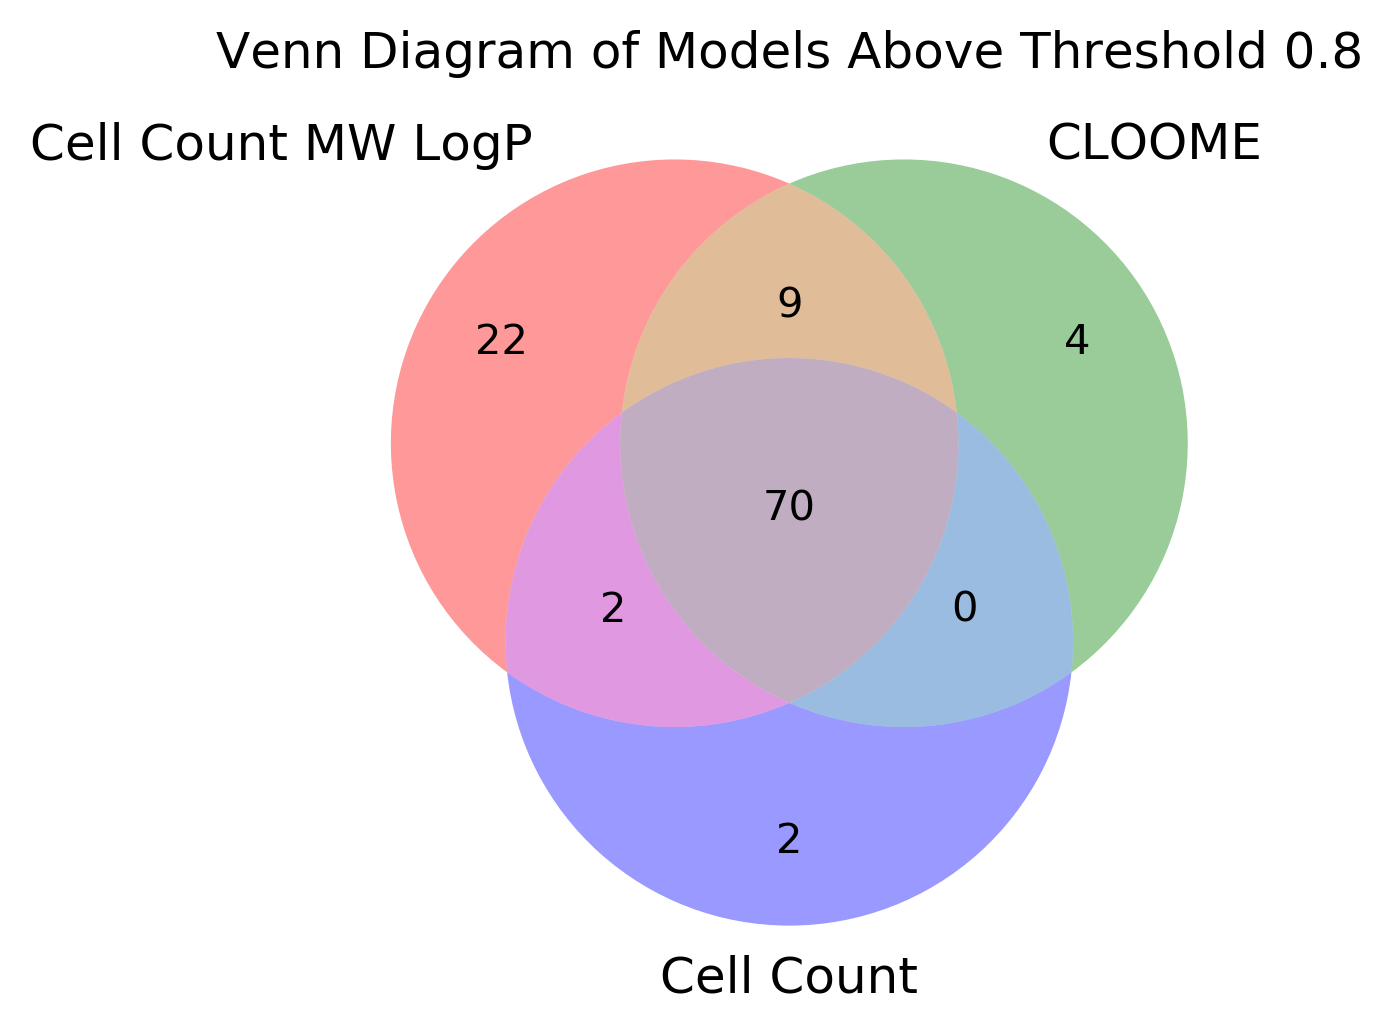

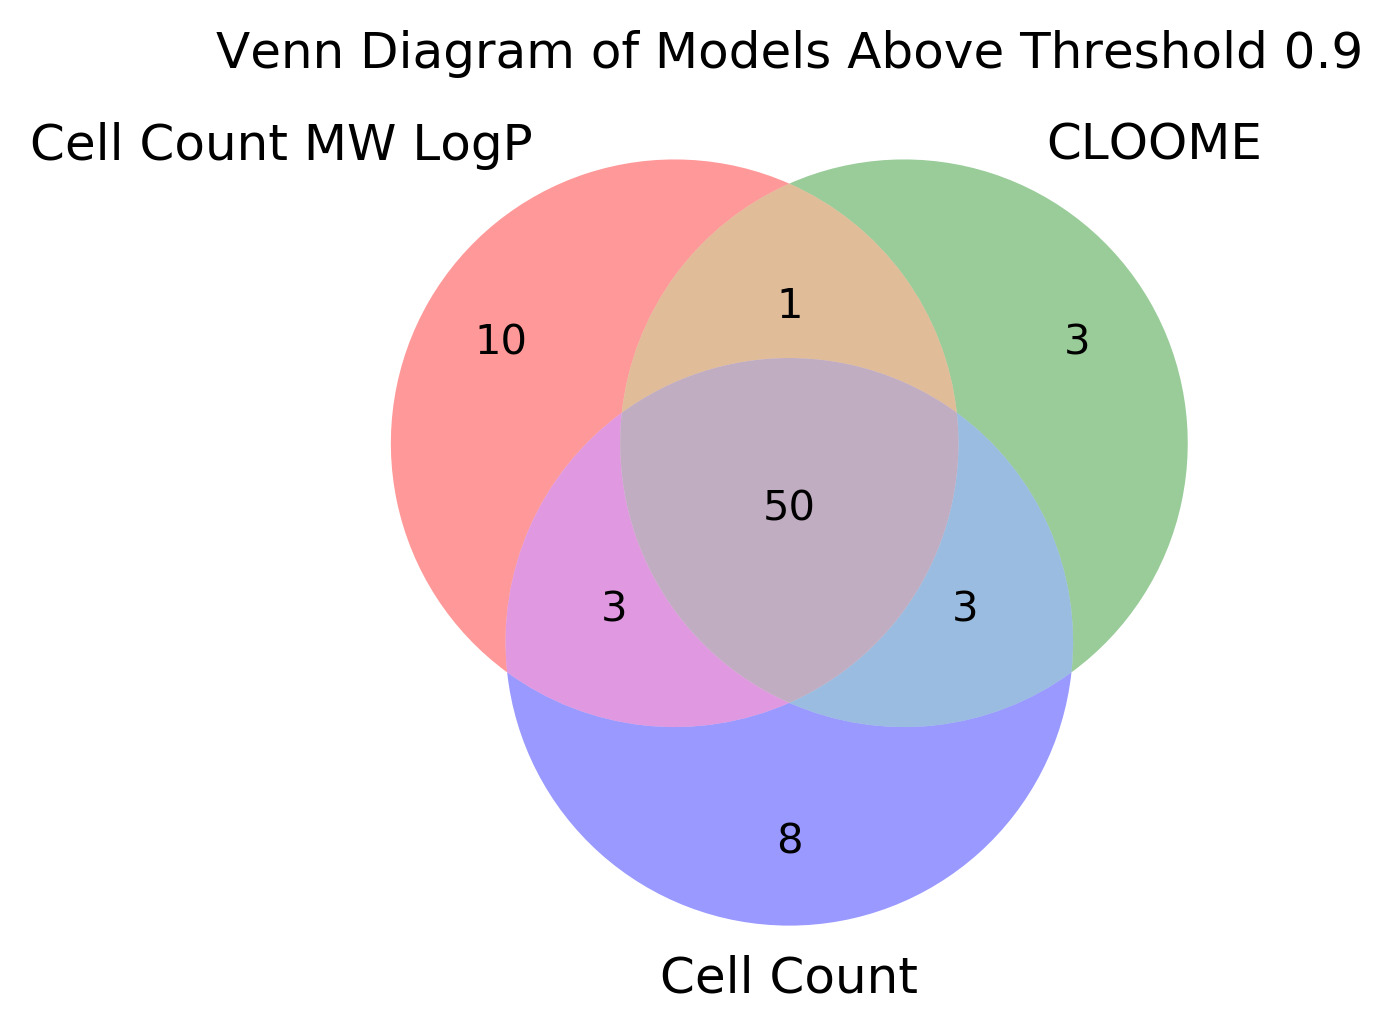

In [25]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted



# Define threshold
threshold = 0.7

# Get sets of indices for each model where the values are above the threshold
CML_set = set(venndf.index[venndf['Cell Count MW LogP'] > threshold])
CLOOME_set = set(venndf.index[venndf['CLOOME'] > threshold])
cellcounter_set = set(venndf.index[venndf['Cell Count'] > threshold])

# Create the Venn diagram
plt.figure(figsize=(4, 4), dpi=300)
venn3_unweighted([CML_set, CLOOME_set, cellcounter_set], ('Cell Count MW LogP', 'CLOOME', 'Cell Count'))
plt.title('Venn Diagram of Models Above Threshold 0.7')
plt.show()


# Define threshold
threshold = 0.8

# Get sets of indices for each model where the values are above the threshold
CML_set = set(venndf.index[venndf['Cell Count MW LogP'] > threshold])
CLOOME_set = set(venndf.index[venndf['CLOOME'] > threshold])
cellcounter_set = set(venndf.index[venndf['Cell Count'] > threshold])

# Create the Venn diagram
plt.figure(figsize=(4, 4), dpi=300)
venn3_unweighted([CML_set, CLOOME_set, cellcounter_set], ('Cell Count MW LogP', 'CLOOME', 'Cell Count'))
plt.title('Venn Diagram of Models Above Threshold 0.8')
plt.show()


# Define threshold
threshold = 0.9

# Get sets of indices for each model where the values are above the threshold
CML_set = set(venndf.index[venndf['Cell Count MW LogP'] > threshold])
CLOOME_set = set(venndf.index[venndf['CLOOME'] > threshold])
cellcounter_set = set(venndf.index[venndf['Cell Count'] > threshold])

# Create the Venn diagram
plt.figure(figsize=(4,4), dpi=300)
venn3_unweighted([CML_set, CLOOME_set, cellcounter_set], ('Cell Count MW LogP', 'CLOOME', 'Cell Count'))
plt.title('Venn Diagram of Models Above Threshold 0.9')
plt.show()